In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.figure_factory as ff


In [23]:
diab = pd.read_csv("diabetes.csv")
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [24]:
diab.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [25]:
diab['Outcome']=diab['Outcome'].replace(diab['Outcome'].unique(),["Diabetes","No Diabetes"])
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetes
1,1,85,66,29,0,26.6,0.351,31,No Diabetes
2,8,183,64,0,0,23.3,0.672,32,Diabetes
3,1,89,66,23,94,28.1,0.167,21,No Diabetes
4,0,137,40,35,168,43.1,2.288,33,Diabetes


In [26]:
cat=diab.Outcome.value_counts().index.tolist()
val=diab.Outcome.value_counts().tolist()
print(cat,val)

['No Diabetes', 'Diabetes'] [500, 268]


<BarContainer object of 2 artists>

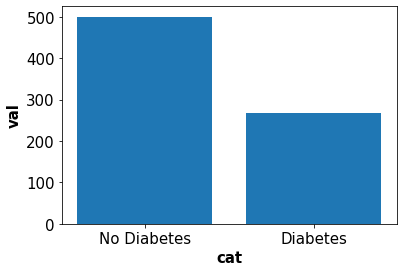

In [27]:
plt.xlabel("cat",fontweight="bold",fontsize="15")
plt.ylabel("val",fontweight="bold",fontsize="15")
plt.bar(cat,val)

In [28]:
catdf = pd.DataFrame({"Label":cat,"Count":val})
fig = px.bar(catdf, x="Label",y="Count",text="Count",
             color="Count",title="Count of Labels",
             height=700, width=600)
fig.show()

In [29]:
catdf = pd.DataFrame({"Label":cat,"Count":val})
fig = px.pie(catdf, names="Label",values="Count",
             title="Count of Labels",
             height=500, width=500)
fig.update_traces(
    textposition="inside",textinfo="percent+label"
)
fig.update_layout(
    font=dict(
        family="Arial",
        size=20,
        color="black",
    )
)
fig.show()

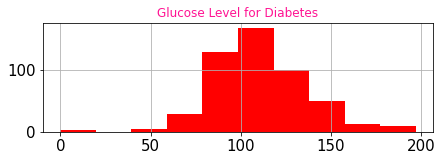

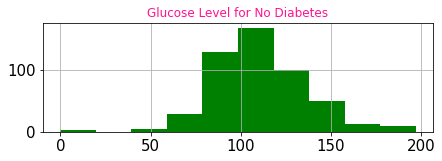

In [30]:
ddf=diab[diab["Outcome"]=="Diabetes"]
ddf=diab[diab["Outcome"]=="No Diabetes"]
plt.figure(figsize=(7,2))
plt.title("Glucose Level for Diabetes")
plt.hist(ddf["Glucose"],color="r")
plt.grid()
plt.show()
plt.figure(figsize=(7,2))
plt.title("Glucose Level for No Diabetes")
plt.hist(ddf["Glucose"],color="g")
plt.grid()
plt.show()

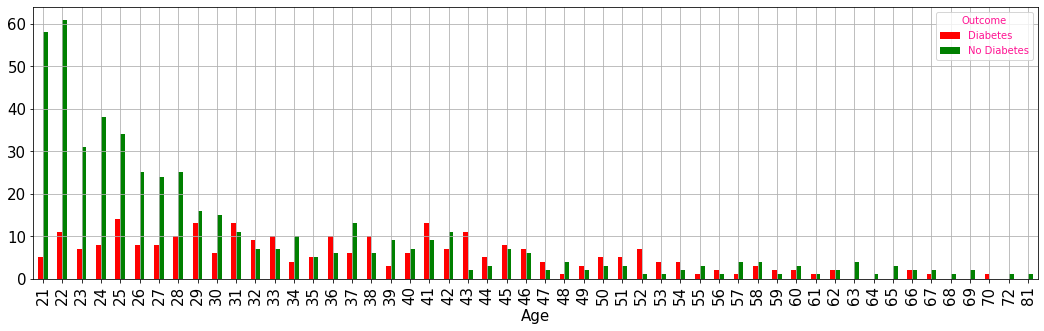

In [31]:
pd.crosstab(diab['Age'], diab['Outcome']).plot(
    kind = "bar", color=["r","g"], figsize=(18,5)
)
plt.grid()
plt.show()

In [32]:
import matplotlib
matplotlib.rcParams["axes.labelsize"]=15
matplotlib.rcParams["xtick.labelsize"]=15
matplotlib.rcParams["ytick.labelsize"]=15
matplotlib.rcParams["text.color"]="#FF1493"

plot the avferage insulin level for diabetes and no diabeyes using plotl y express 

From cross tanulation results of Age and outcomes .Find the age where the higher intances have been found for  diabetes

In [33]:
diab.Outcome = diab.Outcome.replace(diab.Outcome.unique(), [1,0])
diab.Outcome.unique()
cr = diab.corr()
colnames = cr['Outcome'][:-1].index.tolist()
crvals = cr['Outcome'][:-1].tolist()
print(colnames)
print(crvals)
avgcorr = np.array(crvals).mean()
print(avgcorr)
finalfets = []
finalcorrs = []
for i in range(len(crvals)):
    if crvals[i] >= avgcorr:
        finalfets.append(colnames[i])
        finalcorrs.append(crvals[i])
print(finalfets)
print(finalcorrs)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[0.22189815303398636, 0.46658139830687373, 0.06506835955033277, 0.07475223191831946, 0.13054795488404794, 0.2926946626444454, 0.17384406565296004, 0.23835598302719757]
0.2079678511272704
['Pregnancies', 'Glucose', 'BMI', 'Age']
[0.22189815303398636, 0.46658139830687373, 0.2926946626444454, 0.23835598302719757]


**Visualize the correlation by final feature names in bar chart**

In [34]:
crdf = pd.DataFrame({"Features": finalfets, "Correlation": finalcorrs})
crdf = crdf.sort_values(by="Correlation", ascending=False)
fig = px.bar(crdf, x="Features", y="Correlation", text="Correlation",
            color="Features", title="Highly Correlated Features",
            height=500, width=500)
fig.update_layout(
    font=dict(
        family="monospace",
        size=20,
        color="black"
    )
)

fig.show()